# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [6]:
import math
import zipfile
from zipfile import ZipFile
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!

In [7]:
file_name = "readonly/small_img.zip"

In [8]:
def search_zip():
    images=[]
    namefile={}
    with ZipFile(file_name, 'r') as zip: 
        for info in zip.infolist():
            with zip.open(info) as file:
                inf = info.filename
                print(inf)
                img = Image.open(file)
                print(img.size, img.mode, len(img.getdata()))
                #display(img)
                images.append(img)
                namefile[inf] = img
    return images, namefile
images, namefile = search_zip()

a-0.png
(3600, 6300) RGB 22680000
a-1.png
(3600, 6300) RGB 22680000
a-2.png
(3600, 6300) RGB 22680000
a-3.png
(7200, 6300) RGB 45360000


In [9]:
print(namefile)

{'a-0.png': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x7F65297BB048>, 'a-1.png': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x7F6544571FD0>, 'a-2.png': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x7F65297BB080>, 'a-3.png': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=7200x6300 at 0x7F65297BB0B8>}


In [10]:
text_data = []
image_to_run = []
def get_text():
    word = input("Enter Word: ")
    for i in images:
        text = pytesseract.image_to_string(i)
        text_data.append(text)
        if word in text:
            image_to_run.append(i)
get_text()

Enter Word: Chris


In [11]:
print(image_to_run)

def get_faces(images):
    face_image=[]
    imag = np.array(images)
    gray = cv.cvtColor(imag, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for x,y,w,h in faces:
        face = images.crop((x,y,x+w,y+h))
        face_image.append(face)
    return face_image

print('done!')

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x7F65297BB048>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=7200x6300 at 0x7F65297BB0B8>]
done!


In [20]:
def contact_images(images,name):
    a = get_faces(images)
    if(len(a) == 0):
        print("Result found in file {} \nBut there were no faces in that file\n\n".format(name))
    else:
        for faces in a:
            faces.thumbnail((100,100),Image.ANTIALIAS)
        h = math.ceil(len(a)/5)
        contact_sheet=Image.new('RGB',(500, 100*h))
        x=0
        y=0
        for img in a:
            contact_sheet.paste(img, (x, y) )
            if x+100 == contact_sheet.width:
                x=0
                y=y+100
            else:
                x=x+100
        display(contact_sheet)
print('done')

done


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x7F65297BB048>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=7200x6300 at 0x7F65297BB0B8>]


Result found in file a-0.png


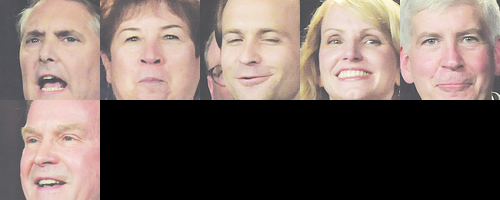

Result found in file a-3.png


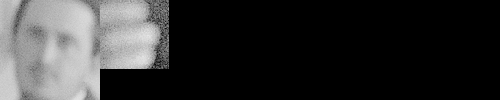

In [13]:
print(image_to_run)
#print('\n')
#print(namefile)
print('\n')
for i in image_to_run:
    #print(i)
    for j,k in namefile.items():
        if i == k:
            print("Result found in file {}".format(j))
            contact_images(i,j)

a-0.png
(3600, 6300) RGB 22680000
a-1.png
(3600, 6300) RGB 22680000
a-10.png
(6300, 3600) RGB 22680000
a-11.png
(3150, 3600) RGB 11340000
a-12.png
(3150, 3600) RGB 11340000
a-13.png
(3150, 3600) RGB 11340000
a-2.png
(3600, 6300) RGB 22680000
a-3.png
(7200, 6300) RGB 45360000
a-4.png
(3600, 6300) RGB 22680000
a-5.png
(3600, 6300) RGB 22680000
a-6.png
(3600, 6300) RGB 22680000
a-7.png
(3150, 3600) RGB 11340000
a-8.png
(3150, 3600) RGB 11340000
a-9.png
(3150, 3600) RGB 11340000
Enter Word: Mark
[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x7F65297BBCC0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x7F65297BBC18>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=6300x3600 at 0x7F65297BBBE0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=3150x3600 at 0x7F65297BBD68>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x7F65297BBC88>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=7200x6300 at 0x7F65297BBD30>, <PIL

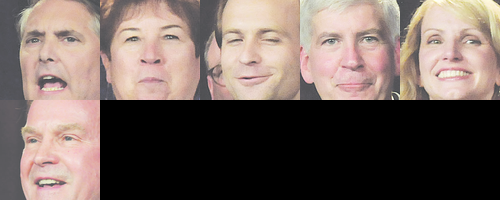

Result found in file a-1.png


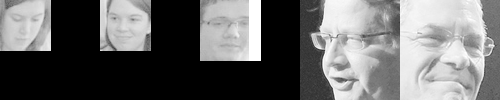

Result found in file a-10.png


IndexError: list index out of range

In [14]:
file_name = "readonly/images.zip"
images, namefile = search_zip()
text_data = []
image_to_run = []
get_text()

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x7F65297BBCC0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x7F65297BBC18>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=6300x3600 at 0x7F65297BBBE0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=3150x3600 at 0x7F65297BBD68>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x7F65297BBC88>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=7200x6300 at 0x7F65297BBD30>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=3150x3600 at 0x7F65297BBEB8>]




Result found in file a-0.png


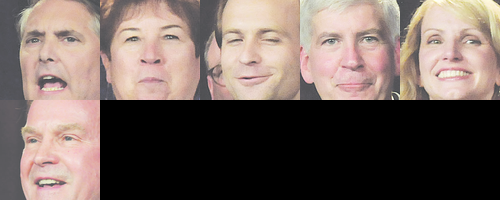

Result found in file a-1.png


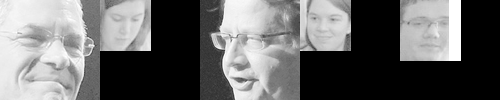

Result found in file a-10.png
Result found in file a-10.png 
But there were no faces in that file


Result found in file a-13.png


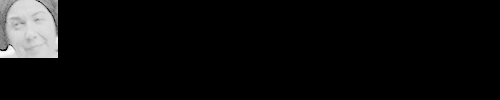

Result found in file a-2.png


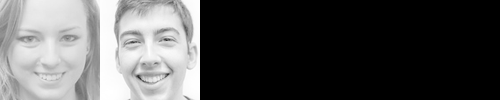

Result found in file a-3.png


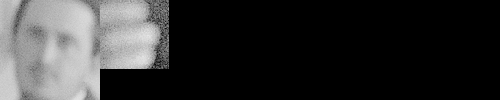

Result found in file a-8.png
Result found in file a-8.png 
But there were no faces in that file




In [21]:
print(image_to_run)
print('\n')
#print('\n')
#print(namefile)
print('\n')
for i in image_to_run:
    #print(i)
    for j,k in namefile.items():
        if i == k:
            print("Result found in file {}".format(j))
            contact_images(i,j)